<a href="https://colab.research.google.com/github/Jwainlee/python-baby/blob/main/%EA%B5%90%EC%9C%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀

In [ ]:
import numpy as np
from sklearn import linear_model

In [ ]:
lm = linear_model.LinearRegression()

In [ ]:
x = [[163], [179], [166], [169], [171]]
y = [54, 63, 57, 56, 58]
print(x)
print(y)

[[163], [179], [166], [169], [171]]
[54, 63, 57, 56, 58]


**LinearRegression()은 다중 회귀분석을 실시하기 위해서 설계되었기 때문에 학습데이터는 반드시 2차원 배열이어야 한다.**

In [ ]:
lm.fit(x, y)

LinearRegression()

In [ ]:
coef = lm.coef_
intercept = lm.intercept_
score = lm.score(x, y)
print(score)

0.9191095132743363


score 출력시 (x, y)필수, fit이어도 예외 X

In [ ]:
print('y = %.2f * x + %.2f' %(coef, intercept))
print('데이터와 선형 회귀 직선의 관계점수: %.2f' %score)

y = 0.53 * x + -32.50
데이터와 선형 회귀 직선의 관계점수: 0.92


## 시각화

In [ ]:
import matplotlib.pyplot as plt

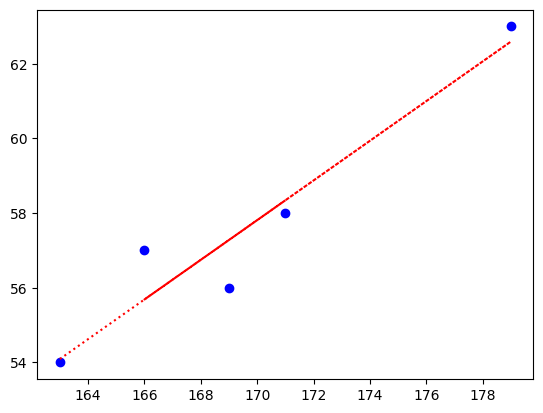

In [ ]:
plt.scatter(x, y, color = 'blue', marker = 'o')
plt.plot(x, lm.predict(x), 'r:')
plt.show()

In [ ]:
unseen = [[167]]
result = lm.predict(unseen)

In [ ]:
print('키 %d cm는 몸무게 %.2f kg으로 추정됨' %(unseen[0][0], result))

키 167 cm는 몸무게 56.22 kg으로 추정됨


## 예시

남/녀 구분이 있는 데이터 ; 0: 남자 1: 여자

In [ ]:
reg = linear_model.LinearRegression()
x = [[168, 0], [166, 0], [173, 0], [165, 0], [177, 0], [163, 0], [178, 0], [172, 0],
      [163, 1], [162, 1], [171, 1], [162, 1], [164, 1], [162, 1], [158, 1], [173, 1]]
y = [65, 61, 68, 63, 68, 61, 76, 67, 55, 51, 59, 53, 61, 56, 44, 57]

In [ ]:
reg.fit(x, y)

LinearRegression()

In [ ]:
print('계수: %.2f, %.2f' %(reg.coef_[0], reg.coef_[1]))
print('절편: %.2f' %reg.intercept_)
print('점수: %.3f' %reg.score(x, y))
print('동윤이와 은지의 추정 몸무게: ', reg.predict([[167, 0], [167, 1]]))

계수: 0.75, -7.23
절편: -61.23
점수: 0.843
동윤이와 은지의 추정 몸무게:  [63.69388959 56.46358918]


## 오차 구하기

In [ ]:
result = reg.predict(x)
error = (y - result) ** 2

mse = error.sum() / len(x)
print(mse)

8.907618846335327


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print(mean_squared_error(result, y))

8.907618846335327


# 경사하강법

In [ ]:
x = np.array([1, 4.5 , 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

In [ ]:
x

array([ 1. ,  4.5,  9. , 10. , 13. ])

np.newaxis를 쓰면 2차원으로 변형 가능

In [ ]:
x[:, np.newaxis]

array([[ 1. ],
       [ 4.5],
       [ 9. ],
       [10. ],
       [13. ]])

In [ ]:
x[np.newaxis, :]

array([[ 1. ,  4.5,  9. , 10. , 13. ]])

In [ ]:
w, b = 0, 0
learning_rate, epoch = 0.005, 1000

for i in range(epoch):
  y_pred = w * x + b
  error = y_pred - y
  w = w - learning_rate * (error * x).sum()
  b = b - learning_rate * error.sum()

print('w: %.2f, b: %.2f' %(w, b))

w: 0.63, b: -1.65


오차제곱의 식을 계수와 절편으로 미분했을 때, 즉 두 변수에서의 오차의 순간변화율을 구해준다. 그 결과는 2*E[i] * x[i], 2 * E[i]이다.

위의 과정은 sklean의 LinearRegression 클래스에 구현되어 있다.

In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
x_new = x[:, np.newaxis]
print(x_new)

[[ 1. ]
 [ 4.5]
 [ 9. ]
 [10. ]
 [13. ]]


In [ ]:
reg.fit(x_new, y)
print('w: %.2f, b: %.2f' %(reg.coef_, reg.intercept_))

w: 0.63, b: -1.65


## 시각화

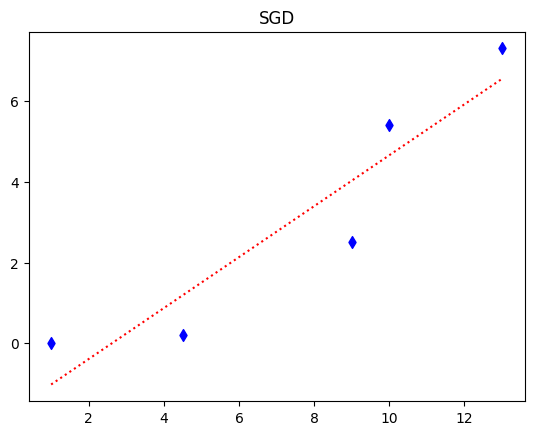

In [ ]:
plt.scatter(x, y, color = 'blue', marker = 'd')
plt.plot(x, w * x + b, 'r:')
plt.title('SGD')
plt.show()

# 선형회귀 예제

In [ ]:
from sklearn import datasets

In [ ]:
x, y = datasets.load_diabetes(return_X_y = True)

In [ ]:
x

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [ ]:
bmi = x[:, np.newaxis, 2]

In [ ]:
bmi[0:5]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_tr, x_te, y_tr, y_te = train_test_split(bmi, y, test_size = 0.1, random_state = 0)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(x_tr, y_tr)

LinearRegression()

In [ ]:
y_pred = reg.predict(x_te)

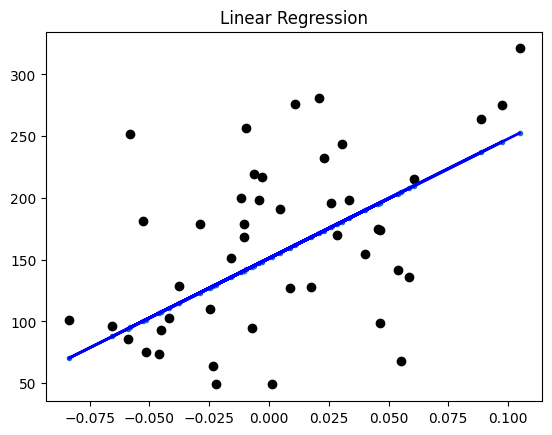

In [ ]:
plt.plot(x_te, y_pred, '.')
plt.scatter(x_te, y_te, color = 'black')
plt.plot(x_te, y_pred, color = 'blue', linewidth = 2)
plt.title('Linear Regression')
plt.show()

## 성능 측정 지표

### MAE

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_te, y_pred)

50.46433577301329

### MSE(RMSE)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_te, y_pred)

3914.8746802340793

In [ ]:
np.sqrt(mean_squared_error(y_te, y_pred))

62.5689593986833

### 결정계수

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_te, y_pred)

0.1913673289984542

# 다중 회귀

## data 불러오기

In [177]:
import pandas as pd

In [178]:
data = pd.read_csv('https://github.com/dongupak/DataML/raw/main/csv/life_expectancy.csv')

In [179]:
data.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [180]:
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


## EDA

In [181]:
import seaborn as sn
import matplotlib.pyplot as plt

<ipython-input-186-6ca81da59d04>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr().round(2)


<Axes: >

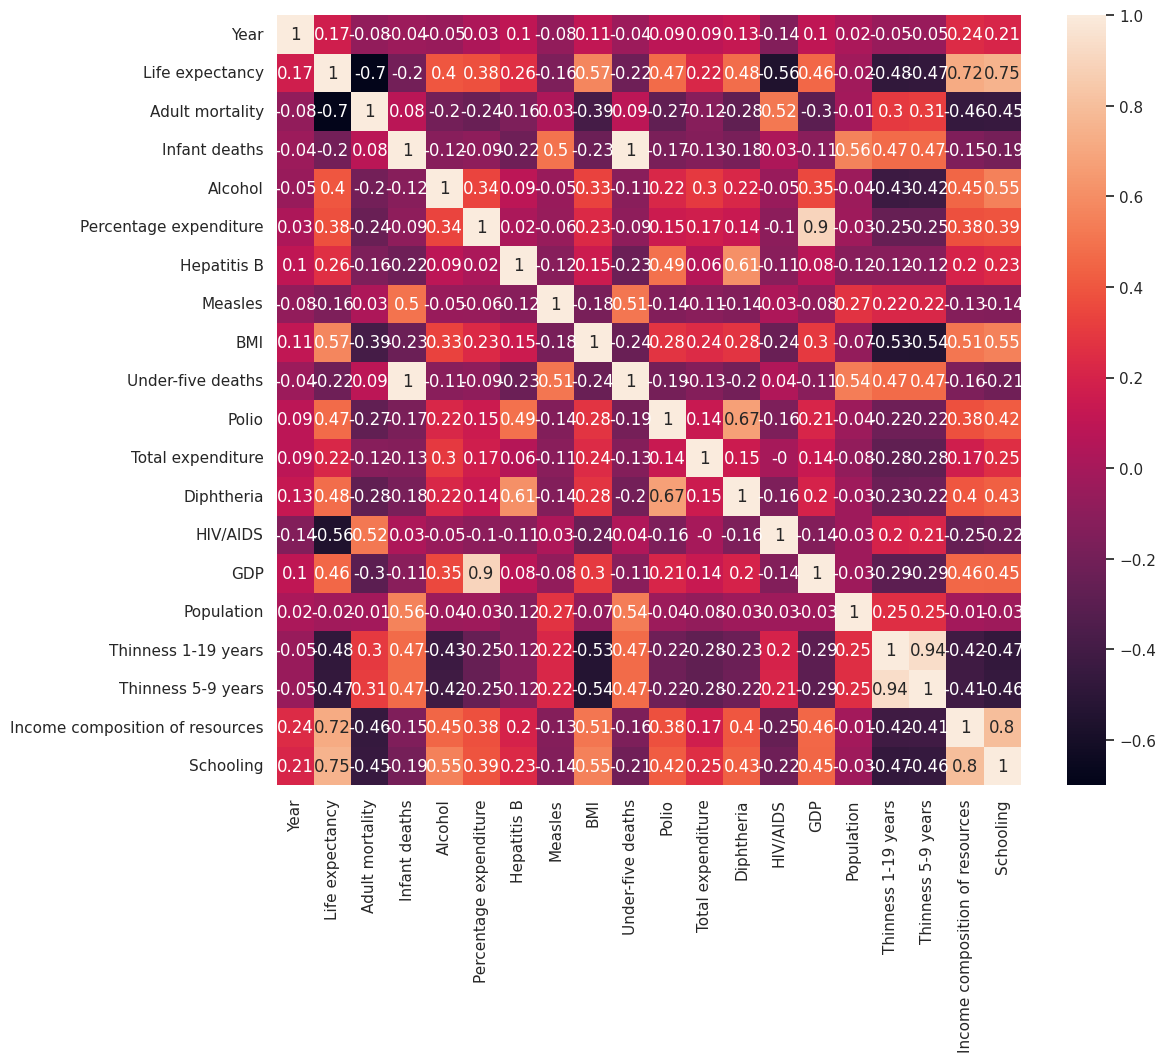

In [186]:
sn.set(rc = {'figure.figsize': (12, 10)})
correlation_matrix = data.corr().round(2)
sn.heatmap(correlation_matrix, annot = True)

In [188]:
correlation_matrix['Life expectancy'].sort_values(ascending = False)[1:]

Schooling                          0.75
Income composition of resources    0.72
BMI                                0.57
Diphtheria                         0.48
Polio                              0.47
GDP                                0.46
Alcohol                            0.40
Percentage expenditure             0.38
Hepatitis B                        0.26
Total expenditure                  0.22
Year                               0.17
Population                        -0.02
Measles                           -0.16
Infant deaths                     -0.20
Under-five deaths                 -0.22
Thinness 5-9 years                -0.47
Thinness 1-19 years               -0.48
HIV/AIDS                          -0.56
Adult mortality                   -0.70
Name: Life expectancy, dtype: float64

In [201]:
rank = correlation_matrix['Life expectancy'].sort_values(ascending = False)[1:]
rank.index

Index(['Schooling', 'Income composition of resources', 'BMI', 'Diphtheria',
       'Polio', 'GDP', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Total expenditure', 'Year', 'Population', 'Measles', 'Infant deaths',
       'Under-five deaths', 'Thinness 5-9 years', 'Thinness 1-19 years',
       'HIV/AIDS', 'Adult mortality'],
      dtype='object')

<Figure size 1000x1000 with 0 Axes>

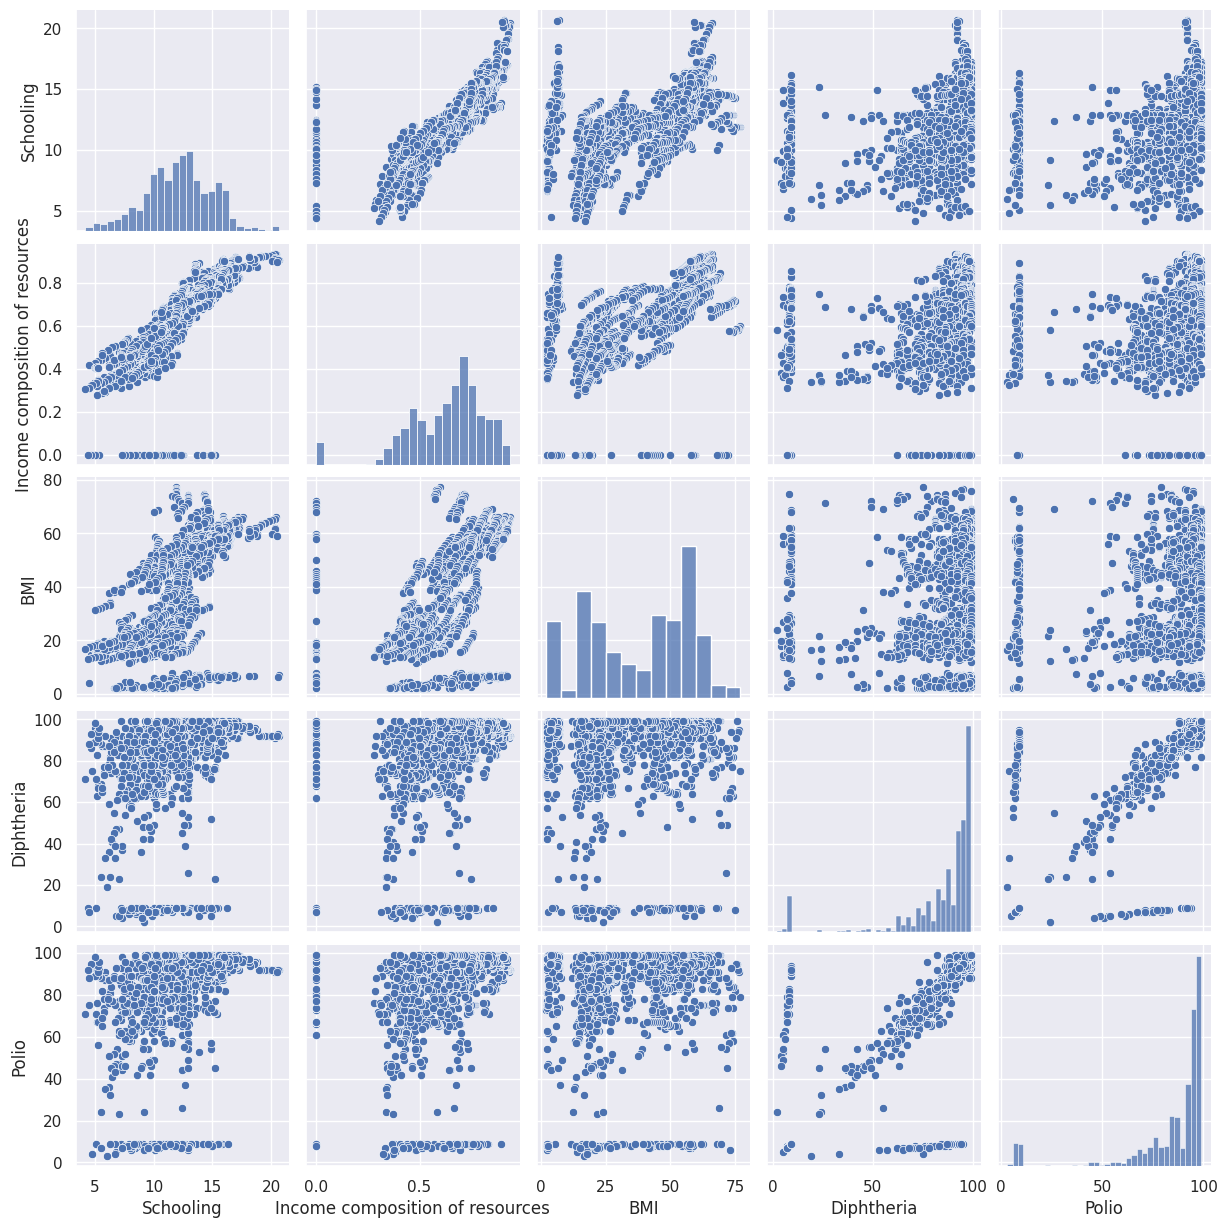

In [303]:
plt.figure(figsize = (10,10))
sn.pairplot(data[rank.index[0:5]])

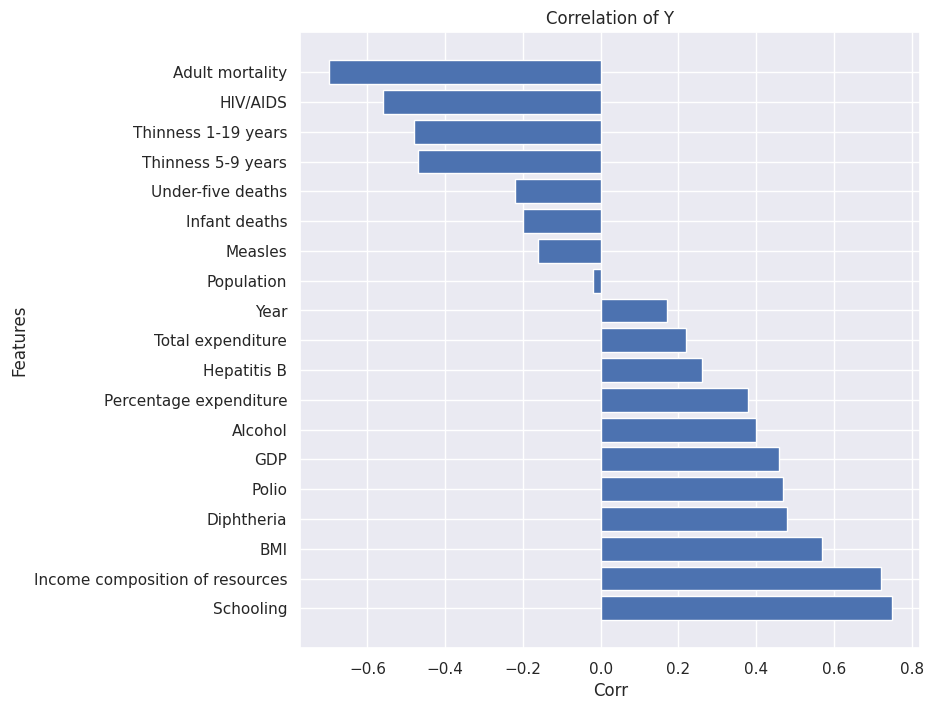

In [308]:
plt.figure(figsize = (8, 8))
plt.barh(rank.index, rank.values)
plt.xlabel('Corr')
plt.ylabel('Features')
plt.title('Correlation of Y')
plt.show()

Schooling                          0.75
Income composition of resources    0.72
BMI                                0.57
Diphtheria                         0.48
Polio                              0.47
GDP                                0.46
Alcohol                            0.40
Percentage expenditure             0.38
Hepatitis B                        0.26
Total expenditure                  0.22
Year                               0.17
Population                        -0.02
Measles                           -0.16
Infant deaths                     -0.20
Under-five deaths                 -0.22
Thinness 5-9 years                -0.47
Thinness 1-19 years               -0.48
HIV/AIDS                          -0.56
Adult mortality                   -0.70
Name: Life expectancy, dtype: float64

In [337]:
a = np.abs(rank)

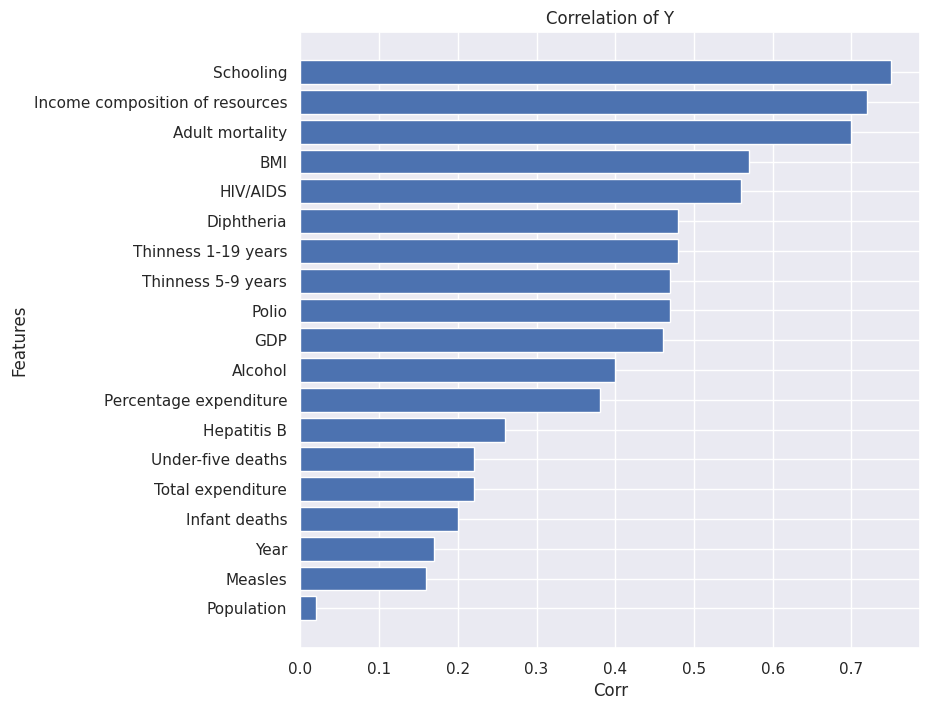

In [339]:
plt.figure(figsize = (8, 8))
plt.barh(a.sort_values(ascending =True).index, a.sort_values(ascending = True).values)
plt.xlabel('Corr')
plt.ylabel('Features')
plt.title('Correlation of Y')
plt.show()

## Modeling

In [206]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### 결측값 확인 및 제거

In [220]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult mortality                     10
Infant deaths                        0
Alcohol                            194
Percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 1-19 years                 34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [224]:
data .dropna(inplace = True)

In [226]:
data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 1-19 years                0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

### 변수 선택 model

In [227]:
x = data[rank.index[0:5]]
y = data['Life expectancy']

In [228]:
x

,Schooling,Income composition of resources,BMI,Diphtheria,Polio
0,10.1,0.479,19.1,65.0,6.0
1,10.0,0.476,18.6,62.0,58.0
2,9.9,0.470,18.1,64.0,62.0
3,9.8,0.463,17.6,67.0,67.0
4,9.5,0.454,17.2,68.0,68.0
...,...,...,...,...,...
2933,9.2,0.407,27.1,65.0,67.0
2934,9.5,0.418,26.7,68.0,7.0
2935,10.0,0.427,26.3,71.0,73.0
2936,9.8,0.427,25.9,75.0,76.0


In [229]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Schooling                        1649 non-null   float64
 1   Income composition of resources  1649 non-null   float64
 2   BMI                              1649 non-null   float64
 3   Diphtheria                       1649 non-null   float64
 4   Polio                            1649 non-null   float64
dtypes: float64(5)
memory usage: 77.3 KB


In [230]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size = 0.2)

In [231]:
lm = linear_model.LinearRegression()
lm.fit(x_tr, y_tr)
print('변수 선택 후 Accuracy: %.3f' %lm.score(x_te, y_te))

변수 선택 후 Accuracy: 0.581


### Full model

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult mortality                  1649 non-null   float64
 5   Infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   Percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  Under-five deaths                1649 non-null   int64  
 12  Polio               

종속변수와 데이터 타입이 object인 컬럼 걸러내기

In [290]:
x = pd.DataFrame()
for i in data.columns:
  if i != 'Life expectancy' and data[i].dtype != 'object':
    x[i] = data[i]

In [291]:
x

,Year,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [292]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size = 0.2)

In [302]:
lm_full = linear_model.LinearRegression()
lm_full.fit(x_tr, y_tr)
print('Full model Accuracy: %.3f' %lm_full.score(x_te, y_te))

Full model Accuracy: 0.798


모든 변수를 넣었을 때의 모델 성능이 좋음.
하지만 모델은 간단할수록 좋으므로 변수중요도를 고려하는 편이 좋다